### Project: Natural Language Processing with Disaster Tweets
**Dataset:**  https://www.kaggle.com/competitions/nlp-getting-started

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Cheking for Null value
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

**We can observe that, there is no missing text in text and target column. So feature engineering is not required**

### Data visualization

In [4]:
location = df['location'].value_counts().head(10)
location.head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [5]:
# print('index :',location.index)
# print('column :',location.values)

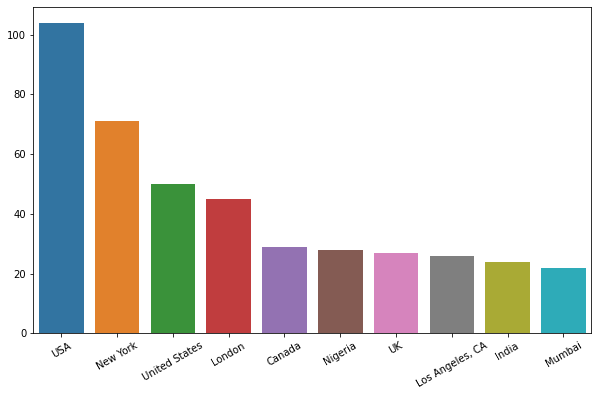

In [6]:
# graph from where most of the tweets comefrom
plt.figure(figsize=(10,6))
sns.barplot(x=location.index,y=location.values);
plt.xticks(rotation = 30);

* **Above graph shows the Places from where the most of the tweets for Disaster camefrom**
* **Most of the tweets came from USA followed by New York........**

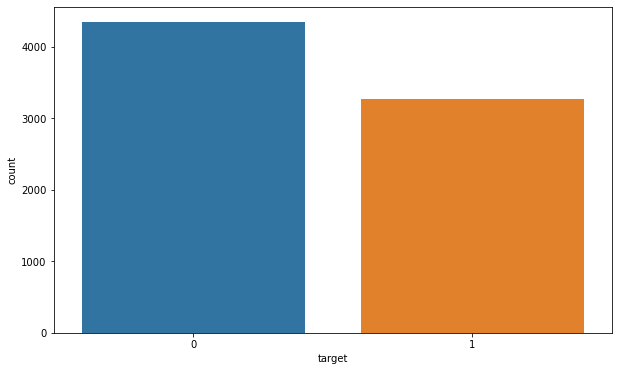

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='target');

**Above graph shows number of target classes**

In [8]:
keyword = df['keyword'].value_counts()
keyword.head(10)

fatalities     45
armageddon     42
deluge         42
damage         41
body%20bags    41
sinking        41
harm           41
outbreak       40
siren          40
twister        40
Name: keyword, dtype: int64

In [9]:
#plt.figure(figsize=(10,50))
#sns.barplot(y=keyword.index,x=keyword.values);
#plt.xticks(rotation = 30);

## Text Preprocessing

**Importing NLP libraries required for text preprocessing**

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()

**Below code perform text preprocessing**
* **Removes all special character**
* **Lowering all texts**
* **Performs stemming operation**
* **Removes all english stop word**

In [11]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
df['cleaned text'] = corpus
df.head(8)

,id,keyword,location,text,target,cleaned text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfir updat california hwi close direct due...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disast heavi rain caus flash flood stree...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,top hill see fire wood


**In above cell**
* **4th column-----> Raw text**
* **6th column-----> Cleaned text**

In [13]:
print('Raw text:', df.iloc[0]['text'])
# print('\n')
print('Cleaned text:', df.iloc[0]['cleaned text'])

Raw text: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Cleaned text: deed reason earthquak may allah forgiv us


## Machine Learning Model

**Separate out the data into X features and y target label**

In [14]:
X = df['cleaned text']
y = df['target']

**Perform a Train|Test split on the data, with a 20% test size. Note: The solution uses a random state of 101**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [17]:
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Creating a function to find out confusion matrix and classification report**

In [19]:
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
def report(model):
    preds = model.predict(X_test_tfidf)
    print('Classification Report:')
    print('----------------------') #---> Not required, just under line for above title
    print(classification_report(y_test,preds))
    print('Confusion Matrix:')
    print('-----------------') #---> Not required, just under line for above title
    plot_confusion_matrix(model,X_test_tfidf,y_test, cmap='copper')

### we can use following cmaps:
**['binary',  'gist_yarg',  'gist_gray',  'gray',  'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])**

### Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       892
           1       0.80      0.65      0.72       631

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Confusion Matrix:
-----------------


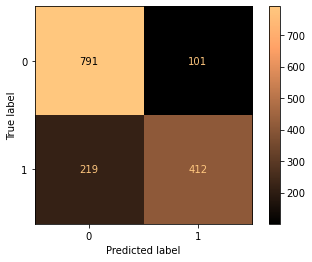

In [21]:
report(nb)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
#log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
log_model = LogisticRegression()
log_model.fit(X_train_tfidf,y_train)

LogisticRegression()

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       892
           1       0.78      0.70      0.74       631

    accuracy                           0.80      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.80      0.79      1523

Confusion Matrix:
-----------------


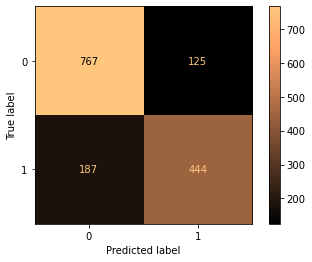

In [23]:
report(log_model)

### K Nearest Neighbor

In [26]:
# Finding best value for K
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_tfidf,y_train)
    y_pred_test = knn_model.predict(X_test_tfidf)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

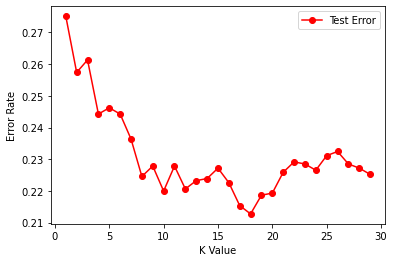

In [27]:
plt.figure(figsize=(6,4))
plt.plot(range(1,30),test_error_rates,label='Test Error', marker='o', color='r')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier(n_neighbors=18)

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       892
           1       0.82      0.62      0.71       631

    accuracy                           0.79      1523
   macro avg       0.80      0.76      0.77      1523
weighted avg       0.79      0.79      0.78      1523

Confusion Matrix:
-----------------


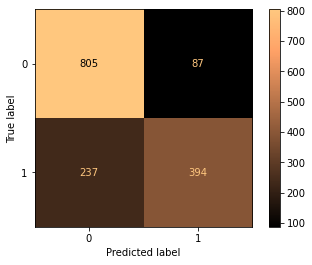

In [29]:
report(knn)

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_tfidf,y_train)

RandomForestClassifier()

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       892
           1       0.81      0.64      0.72       631

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523

Confusion Matrix:
-----------------


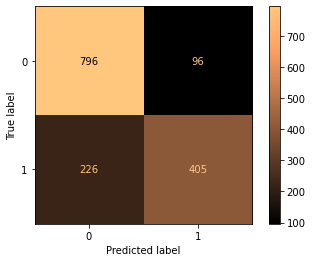

In [31]:
report(model)

### Support Vector Machine

In [32]:
from sklearn.svm import SVC 
svc = SVC(class_weight='balanced')
svc.fit(X_train_tfidf,y_train)

SVC(class_weight='balanced')

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       892
           1       0.78      0.73      0.75       631

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Confusion Matrix:
-----------------


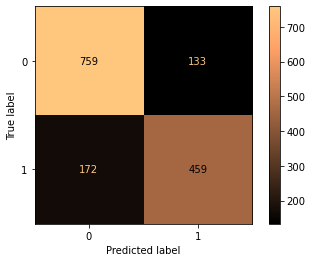

In [33]:
report(svc)

---
## Conclusion
**Logistic Regression and Support Vector Machine gives highest accuracy that is --->  80%**

---